# KNN - Heart Data-Normalization

### Import Libraries

In [2]:
import pandas as pd
import numpy as np

import config1

from sklearn.preprocessing import MinMaxScaler, StandardScaler

from sklearn.model_selection import train_test_split, GridSearchCV, RandomizedSearchCV
from sklearn.neighbors import KNeighborsClassifier

from sklearn.metrics import confusion_matrix, accuracy_score, classification_report

import matplotlib.pyplot as plt
import seaborn as sns

import pickle
import json

### 1. Problem Statement

### 2. Data Gathering

In [3]:
df = pd.read_csv('heart.csv')
df

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
298,57,0,0,140,241,0,1,123,1,0.2,1,0,3,0
299,45,1,3,110,264,0,1,132,0,1.2,1,0,3,0
300,68,1,0,144,193,1,1,141,0,3.4,1,2,3,0
301,57,1,0,130,131,0,1,115,1,1.2,1,1,3,0


In [4]:
df.columns

Index(['age', 'sex', 'cp', 'trestbps', 'chol', 'fbs', 'restecg', 'thalach',
       'exang', 'oldpeak', 'slope', 'ca', 'thal', 'target'],
      dtype='object')

### 3. EDA

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 303 entries, 0 to 302
Data columns (total 14 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       303 non-null    int64  
 1   sex       303 non-null    int64  
 2   cp        303 non-null    int64  
 3   trestbps  303 non-null    int64  
 4   chol      303 non-null    int64  
 5   fbs       303 non-null    int64  
 6   restecg   303 non-null    int64  
 7   thalach   303 non-null    int64  
 8   exang     303 non-null    int64  
 9   oldpeak   303 non-null    float64
 10  slope     303 non-null    int64  
 11  ca        303 non-null    int64  
 12  thal      303 non-null    int64  
 13  target    303 non-null    int64  
dtypes: float64(1), int64(13)
memory usage: 33.3 KB


In [5]:
df.isna().sum()

age         0
sex         0
cp          0
trestbps    0
chol        0
fbs         0
restecg     0
thalach     0
exang       0
oldpeak     0
slope       0
ca          0
thal        0
target      0
dtype: int64

In [6]:
df.target.value_counts()

1    165
0    138
Name: target, dtype: int64

### 4. Feature Engineering

#### 4.1 Normalization

In [8]:
Xmin = x['age'].min() # 29
Xmax = x['age'].max() # 77
Xmax

NameError: name 'x' is not defined

In [7]:
Xnew = (63 - Xmin)/(Xmax - Xmin)
Xnew

NameError: name 'Xmin' is not defined

In [10]:
x = df.drop('target',axis =1) # 303 Rows and 13 Columns

normal_scaler = MinMaxScaler() # Xmin and Xmax
normal_scaler.fit(x) # Xmin and Xmax
array1 = normal_scaler.transform(x) 
normal_dfx = pd.DataFrame(array1, columns=x.columns)
normal_dfx

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal
0,0.708333,1.0,1.000000,0.481132,0.244292,1.0,0.0,0.603053,0.0,0.370968,0.0,0.00,0.333333
1,0.166667,1.0,0.666667,0.339623,0.283105,0.0,0.5,0.885496,0.0,0.564516,0.0,0.00,0.666667
2,0.250000,0.0,0.333333,0.339623,0.178082,0.0,0.0,0.770992,0.0,0.225806,1.0,0.00,0.666667
3,0.562500,1.0,0.333333,0.245283,0.251142,0.0,0.5,0.816794,0.0,0.129032,1.0,0.00,0.666667
4,0.583333,0.0,0.000000,0.245283,0.520548,0.0,0.5,0.702290,1.0,0.096774,1.0,0.00,0.666667
...,...,...,...,...,...,...,...,...,...,...,...,...,...
298,0.583333,0.0,0.000000,0.433962,0.262557,0.0,0.5,0.396947,1.0,0.032258,0.5,0.00,1.000000
299,0.333333,1.0,1.000000,0.150943,0.315068,0.0,0.5,0.465649,0.0,0.193548,0.5,0.00,1.000000
300,0.812500,1.0,0.000000,0.471698,0.152968,1.0,0.5,0.534351,0.0,0.548387,0.5,0.50,1.000000
301,0.583333,1.0,0.000000,0.339623,0.011416,0.0,0.5,0.335878,1.0,0.193548,0.5,0.25,1.000000


#### 4.2 Standardization

### 5. Feature Selection

### 6. Model Training

In [11]:
y = df['target']
x_train, x_test, y_train, y_test = train_test_split(normal_dfx, y, test_size=0.2, 
                                                    random_state=30, stratify=y)


In [12]:
knn_clf = KNeighborsClassifier(n_neighbors=5, p = 2)
knn_clf.fit(x_train, y_train)

KNeighborsClassifier()

### 7. Model Evaluation

In [13]:
# Training Data Evaluation

y_pred_train = knn_clf.predict(x_train)

#cnf_matrix = confusion_matrix(y_train, y_pred_train)
#print("Confusion Matrix :\n", cnf_matrix)

#accuracy = accuracy_score(y_train, y_pred_train)
#print("Accuracy :", accuracy)

clf_report = classification_report(y_train, y_pred_train)
print("Classification Report :\n", clf_report)

Classification Report :
               precision    recall  f1-score   support

           0       0.90      0.84      0.87       110
           1       0.87      0.92      0.90       132

    accuracy                           0.88       242
   macro avg       0.89      0.88      0.88       242
weighted avg       0.89      0.88      0.88       242



In [14]:
# Testing Data Evaluation

y_pred = knn_clf.predict(x_test)

cnf_matrix = confusion_matrix(y_test, y_pred)
print("Confusion Matrix :\n", cnf_matrix)

accuracy = accuracy_score(y_test, y_pred)
print("Accuracy :", accuracy)

clf_report = classification_report(y_test, y_pred)
print("Classification Report :\n", clf_report)

Confusion Matrix :
 [[20  8]
 [ 7 26]]
Accuracy : 0.7540983606557377
Classification Report :
               precision    recall  f1-score   support

           0       0.74      0.71      0.73        28
           1       0.76      0.79      0.78        33

    accuracy                           0.75        61
   macro avg       0.75      0.75      0.75        61
weighted avg       0.75      0.75      0.75        61



### 1. Hyperparameter Tuning

In [15]:
knn_clf_model = KNeighborsClassifier(n_neighbors= 5, p = 2)

hyp_grid = {"n_neighbors": np.arange(3,20),
           'p' : [1,2]}

gscv_knn_clf = GridSearchCV(knn_clf_model,hyp_grid, cv = 10)
gscv_knn_clf.fit(x_train, y_train)
gscv_knn_clf.best_estimator_

KNeighborsClassifier(n_neighbors=10, p=1)

In [16]:
gscv_knn_clf.best_params_

{'n_neighbors': 10, 'p': 1}

In [17]:
# knn_clf = KNeighborsClassifier(n_neighbors=18, p=1)
knn_clf = gscv_knn_clf.best_estimator_
knn_clf.fit(x_train, y_train)

KNeighborsClassifier(n_neighbors=10, p=1)

In [26]:
# x_train

In [18]:
# Training Data Evaluation

y_pred_train = knn_clf.predict(x_train)

cnf_matrix = confusion_matrix(y_train, y_pred_train)
print("Confusion Matrix :\n", cnf_matrix)

accuracy = accuracy_score(y_train, y_pred_train)
print("Accuracy :", accuracy)

clf_report = classification_report(y_train, y_pred_train)
print("Classification Report :\n", clf_report)

Confusion Matrix :
 [[ 94  16]
 [ 14 118]]
Accuracy : 0.8760330578512396
Classification Report :
               precision    recall  f1-score   support

           0       0.87      0.85      0.86       110
           1       0.88      0.89      0.89       132

    accuracy                           0.88       242
   macro avg       0.88      0.87      0.87       242
weighted avg       0.88      0.88      0.88       242



In [19]:
# Testing Data Evaluation

y_pred = knn_clf.predict(x_test)

cnf_matrix = confusion_matrix(y_test, y_pred)
print("Confusion Matrix :\n", cnf_matrix)

accuracy = accuracy_score(y_test, y_pred)
print("Accuracy :", accuracy)

clf_report = classification_report(y_test, y_pred)
print("Classification Report :\n", clf_report)

Confusion Matrix :
 [[22  6]
 [ 5 28]]
Accuracy : 0.819672131147541
Classification Report :
               precision    recall  f1-score   support

           0       0.81      0.79      0.80        28
           1       0.82      0.85      0.84        33

    accuracy                           0.82        61
   macro avg       0.82      0.82      0.82        61
weighted avg       0.82      0.82      0.82        61



#### 2. Train on Different Values of K and p

##### 2.1 Train with Manhattan Distance (p = 1)

In [20]:
train_accuracy_list = []
test_accuracy_list = list()
k_values = np.arange(3,20)
for k in k_values:
    knn_clf = KNeighborsClassifier(n_neighbors=k, p=1)
    knn_clf.fit(x_train, y_train)
    
    train_accuracy = np.around(knn_clf.score(x_train, y_train),3)
    train_accuracy_list.append(train_accuracy)
    
    test_accuracy = np.around(knn_clf.score(x_test, y_test),3)
    test_accuracy_list.append(test_accuracy)


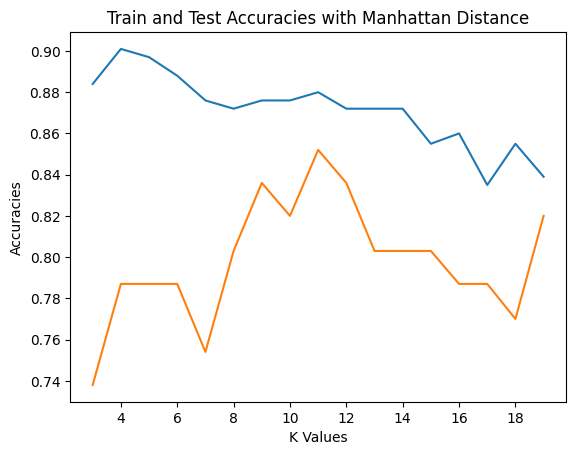

In [21]:
plt.plot(k_values, train_accuracy_list)
plt.plot(k_values, test_accuracy_list)
plt.xlabel("K Values")
plt.ylabel('Accuracies')
plt.title("Train and Test Accuracies with Manhattan Distance")
plt.savefig("Accuracy_MD.png")

In [22]:
knn_clf = KNeighborsClassifier(n_neighbors=11, p=1)
knn_clf.fit(x_train, y_train)

# Training Data Evaluation

y_pred_train = knn_clf.predict(x_train)

cnf_matrix = confusion_matrix(y_train, y_pred_train)
print("Confusion Matrix :\n", cnf_matrix)

accuracy = accuracy_score(y_train, y_pred_train)
print("Accuracy :", accuracy)

clf_report = classification_report(y_train, y_pred_train)
print("Classification Report :\n", clf_report)

Confusion Matrix :
 [[ 92  18]
 [ 11 121]]
Accuracy : 0.8801652892561983
Classification Report :
               precision    recall  f1-score   support

           0       0.89      0.84      0.86       110
           1       0.87      0.92      0.89       132

    accuracy                           0.88       242
   macro avg       0.88      0.88      0.88       242
weighted avg       0.88      0.88      0.88       242



In [32]:
# Testing Data Evaluation

y_pred = knn_clf.predict(x_test)

cnf_matrix = confusion_matrix(y_test, y_pred)
print("Confusion Matrix :\n", cnf_matrix)

accuracy = accuracy_score(y_test, y_pred)
print("Accuracy :", accuracy)

clf_report = classification_report(y_test, y_pred)
print("Classification Report :\n", clf_report)

Confusion Matrix :
 [[22  6]
 [ 3 30]]
Accuracy : 0.8524590163934426
Classification Report :
               precision    recall  f1-score   support

           0       0.88      0.79      0.83        28
           1       0.83      0.91      0.87        33

    accuracy                           0.85        61
   macro avg       0.86      0.85      0.85        61
weighted avg       0.85      0.85      0.85        61



##### 2.2 Train with Euclidean Distance (p = 2)

In [23]:
train_accuracy_list = []
test_accuracy_list = list()|
k_values = np.arange(3,20)
for k in k_values:
    knn_clf = KNeighborsClassifier(n_neighbors=k, p=2)
    knn_clf.fit(x_train, y_train)
    
    train_accuracy = np.around(knn_clf.score(x_train, y_train),3)
    train_accuracy_list.append(train_accuracy)
    
    test_accuracy = np.around(knn_clf.score(x_test, y_test),3)
    test_accuracy_list.append(test_accuracy)


SyntaxError: invalid syntax (1278946398.py, line 2)

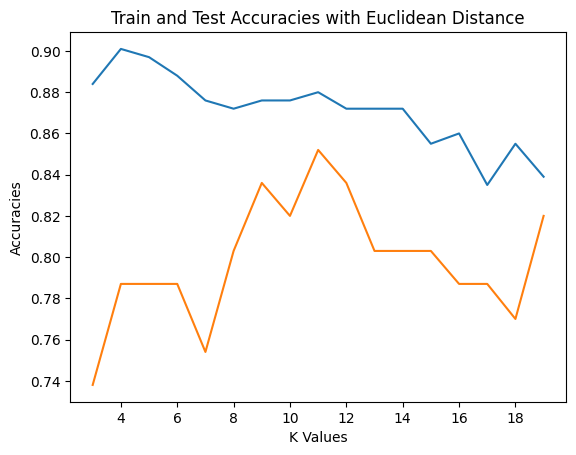

In [24]:
plt.plot(k_values, train_accuracy_list)
plt.plot(k_values, test_accuracy_list)
plt.xlabel("K Values")
plt.ylabel('Accuracies')
plt.title("Train and Test Accuracies with Euclidean Distance")
plt.savefig("Accuracy_ED.png")

In [25]:
knn_clf = KNeighborsClassifier(n_neighbors=8, p=2)
knn_clf.fit(x_train, y_train)

# Training Data Evaluation

y_pred_train = knn_clf.predict(x_train)

cnf_matrix = confusion_matrix(y_train, y_pred_train)
print("Confusion Matrix :\n", cnf_matrix)

accuracy = accuracy_score(y_train, y_pred_train)
print("Accuracy :", accuracy)

clf_report = classification_report(y_train, y_pred_train)
print("Classification Report :\n", clf_report)

Confusion Matrix :
 [[ 91  19]
 [ 21 111]]
Accuracy : 0.8347107438016529
Classification Report :
               precision    recall  f1-score   support

           0       0.81      0.83      0.82       110
           1       0.85      0.84      0.85       132

    accuracy                           0.83       242
   macro avg       0.83      0.83      0.83       242
weighted avg       0.84      0.83      0.83       242



In [26]:
# Testing Data Evaluation

y_pred = knn_clf.predict(x_test)

cnf_matrix = confusion_matrix(y_test, y_pred)
print("Confusion Matrix :\n", cnf_matrix)

accuracy = accuracy_score(y_test, y_pred)
print("Accuracy :", accuracy)

clf_report = classification_report(y_test, y_pred)
print("Classification Report :\n", clf_report)

Confusion Matrix :
 [[23  5]
 [ 5 28]]
Accuracy : 0.8360655737704918
Classification Report :
               precision    recall  f1-score   support

           0       0.82      0.82      0.82        28
           1       0.85      0.85      0.85        33

    accuracy                           0.84        61
   macro avg       0.83      0.83      0.83        61
weighted avg       0.84      0.84      0.84        61



In [27]:
x_train

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal
245,0.395833,1.0,0.000000,0.283019,0.337900,0.0,0.0,0.725191,0.0,0.080645,0.5,0.00,1.000000
126,0.375000,1.0,0.000000,0.169811,0.178082,0.0,0.5,0.549618,0.0,0.016129,1.0,0.00,0.666667
147,0.645833,0.0,1.000000,0.528302,0.260274,0.0,0.5,0.763359,0.0,0.145161,1.0,0.00,0.666667
54,0.708333,0.0,0.666667,0.386792,0.287671,0.0,0.0,0.770992,0.0,0.000000,1.0,0.00,0.666667
187,0.520833,1.0,0.000000,0.283019,0.319635,0.0,0.0,0.290076,1.0,0.354839,0.5,0.25,1.000000
...,...,...,...,...,...,...,...,...,...,...,...,...,...
274,0.375000,1.0,0.000000,0.150943,0.340183,0.0,0.0,0.358779,1.0,0.161290,0.5,0.25,0.666667
199,0.750000,1.0,0.000000,0.150943,0.278539,0.0,0.0,0.664122,0.0,0.096774,1.0,0.50,0.333333
21,0.312500,1.0,0.666667,0.339623,0.244292,0.0,0.5,0.824427,1.0,0.064516,1.0,0.00,0.666667
233,0.729167,1.0,0.000000,0.245283,0.273973,0.0,0.0,0.190840,1.0,0.354839,0.0,0.25,0.666667


In [28]:
knn_clf = KNeighborsClassifier(n_neighbors=11, p=1)
knn_clf.fit(x_train, y_train)

KNeighborsClassifier(n_neighbors=11, p=1)

### Save Model 

In [29]:
with open('KNN_model.pkl', 'wb') as f:
    pickle.dump(knn_clf, f)

#### Save MinMaxScaer

In [30]:
normal_scaler # min and Max

MinMaxScaler()

In [32]:
with open('normal_scaler.pkl', 'wb') as f:
    pickle.dump(normal_scaler, f)